# Bike Sharing Analysis and Modeling


In this notebook, the UCI BikeSharing Dataset (https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) is exploratively analyzed with the goal to identify trends and important features in the data. The results of this exploratory data analysis (EDA) will then be used to build a model that predicts the number of rides for a given hour in the dataset.

## A. Exploratory Data Analysis

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2})

The data comes in two different files, *day.csv* and *hour.csv*.
They both offer the same features, except that hour.csv yields a feature *hr* that does not occur in the day.csv data set.
Here, hour.csv is an hourly (i.e., more fine grained) representation of day.csv -- 
for each entry in day.csv, there are 24 entries in hour.csv. Let's read the data into pandas dataframes.

In [3]:
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

### 1) A first look at the data

To start, we have a look at the data at hand for both day_data and hour_data.

In [3]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


As the hourly data is more fine-grained, it obiously is the larger dataset. A first look at the features gives some insights which we will follow up on in the remainder of this analysis:

* Each record is associated with a *season*, *year*, *month*, and *hour* (in the hourly data). Thus, we will investigate if there exist temporal data trends in the following.
* Each record is categorized as *holiday*, *weekday*, or *workingday*. We will thus investigate, whether there exist trends in the data based on the type of day.
* Each record is further providing information about the weather situation. Here, a coarse-grained *weathersit* feature, and more specific features like *temperature*, *'feels-like' temperature*, *humidity*, and *windspeed* could have an influence on the number of users using the bike sharing system, as we would expect higher user numbers on days with better-for-cycling weather. We will thus investigate what effects the weather has on the system.
* Finally, each record offers a split of the user numbers into *casual* and *registered* users. We will thus check whether or not there are different usage patterns for casual and registered users, respectively. If that is the case, it might make sense to provide one predictive model each for casual and registered users.

To conclude our first view at the data, let us have a look at the structure of the data, and check whether there are any corrupted or missing data values.

In [5]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


All features except for 'dteday' have only positive values. Some features are categorical (e.g., *'holiday'*), some discrete (e.g., *'temp'*). For simplicity, we will only do a simple check for missing values in this notebook. 

There are many more sanity checks we could apply in case we wanted to dig deeper into the data. For instance, we could
* check whether two neighbouring data points (i.e., two successive days or hours, respectively) have mismatching values (e.g., a huge temperature change; note that this might not neccessarily be corrupted data, but at least we would have to dig into it), 
* check the data ranges for each feature separately (this is in parts already covered by the min and max values for each variable as obtained from pd.describe() above), 
* check conflicting data (e.g., a day that is both holiday and workingday), or
* validate the weather characteristics with an external weather data source.

In this case, there is no missing data:

In [7]:
# missing values?
missing_data = hour_data[hour_data.isnull() == True].count();
print 'Overall empty data fields: ', missing_data.sum()

Overall empty data fields:  0


### 2) Feature correlation

Before going into detail with the investigation of trends, one helpful visualization is to have a look at the correlation between features. This step is also important for building a model in the next step. For instance, when using linear regression, there should be no collinearity in the independent variables.

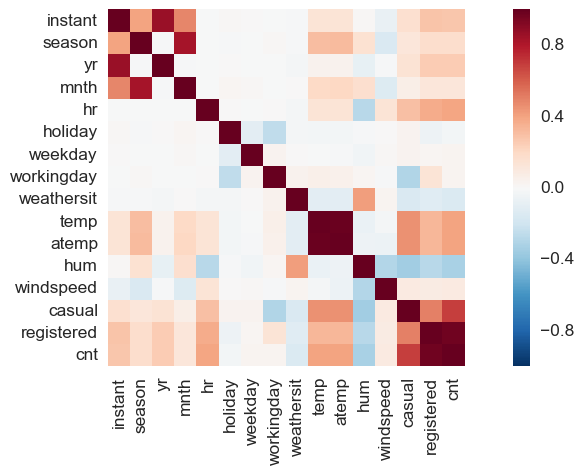

In [8]:
# get correlation matrix and visualize it in figure
cmat = hour_data.corr()

f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cmat, square=True)
f.tight_layout()

Obviously, *'casual'*, *'registered'* and *'cnt'* are strongly positively correlated, as the former two variables consitute the latter one. Similarly, *'mnth'* and *'season'* are also strongly positively correlated. But we can also observe further correlations, which can already be a hint at the relative importance of a feature on the dependent variable. 

For instance, we can see that *'hr'* and both features expressing temperature (*'temp'*,*'atemp'*) are moderately positively correlated with our dependent variable (*'cnt'*), and that several features may have different impact on the number of casual and registrered users, respectively (e.g., *'temp'* is stronger correlated with *'casual'* than with *'registered'*). Another observation is that humidity (*'hum'*) has a moderate negative correlation with *'cnt'* (and again a stronger correlation with *'casual'* than *'registered'*).

One conclusion to draw here is that if we would apply linear regression, we would have to be careful on how we incorporate temperature. Collinearity in independent features does not neccessarily reduce the performance of regression, but it may render regression coefficients highly instable for varying input.

Also, it might make sense to build two distinct predictive models, one for predicting the amount of casual users, and one for predicting the amount of registered users.

### 3) Temporal data trends

The first trend we are going to investigate is the relation between the days the bike sharing concept has been in service and the number of users. Our expectation would be that we will see an increase in *cnt* over time as the system is accepted by the public (e.g., due to more registered users). Apparently, the system attracted more users in its second year of operation. Also, we see seasonal effects, i.e., there are more users in summer than in winter, which intuitively also makes sense.

Note that we can also see that there exist several outliers (e.g., at day ~670, there is one day with close to 0 users). We will investigate these outliers later.

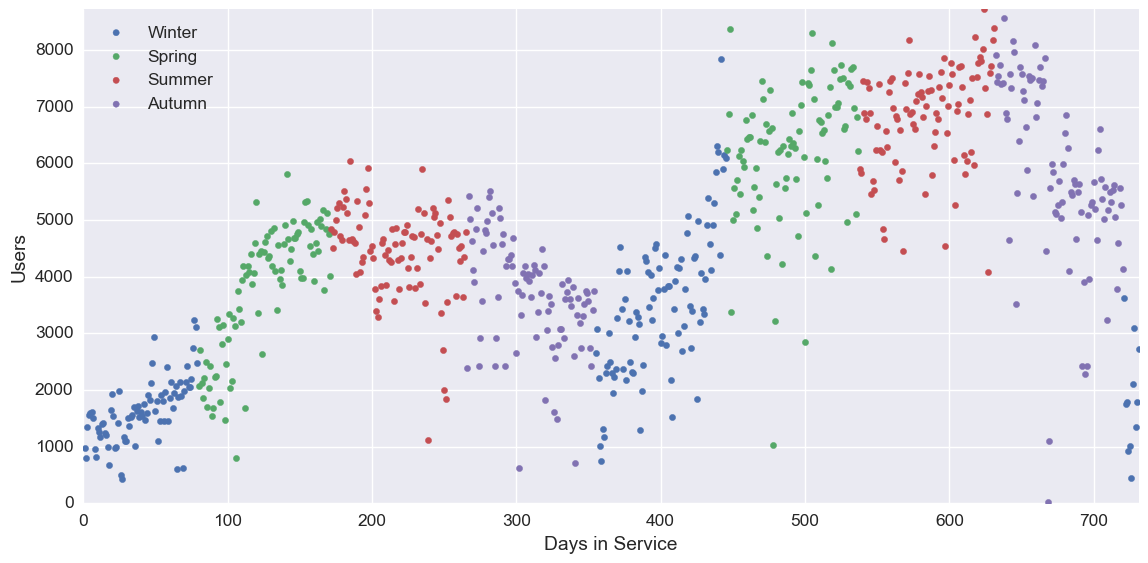

In [9]:
plt.figure(figsize=(19, 6));
g = sns.FacetGrid(day_data, hue='season', size=6, aspect=2);
g.map(plt.scatter, 'instant', 'cnt');

#replace numerical season indicator with textual representation
handles, labels = g.fig.get_axes()[0].get_legend_handles_labels();
titles = ['Winter', 'Spring', 'Summer', 'Autumn'];

g.set_axis_labels('Days in Service', 'Users');
g.fig.get_axes()[0].legend(handles, titles, loc='upper left');
g.fig.get_axes()[0].set_ylim(0,max(day_data['cnt']));
g.fig.get_axes()[0].set_xlim(0,max(day_data['instant']));

A monthly representation shows the gradual shift in user numbers towards higher counts (Winter->Summer) and back to lower counts (Summer->Winter) very nicely.

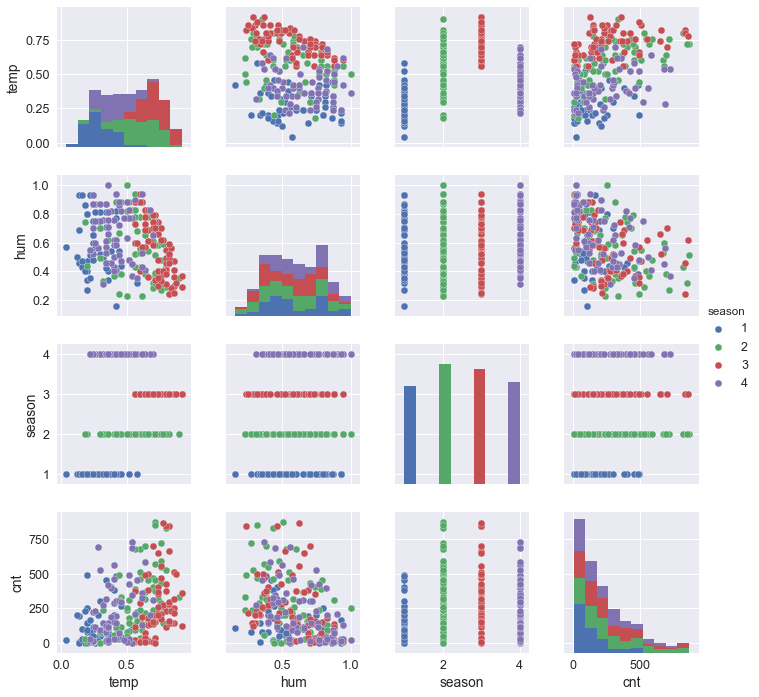

In [83]:
hr_smpl = hour_data.sample(frac=0.015)
columns= ['temp','hum','season','cnt']
sns.pairplot(hr_smpl[columns], hue='season')

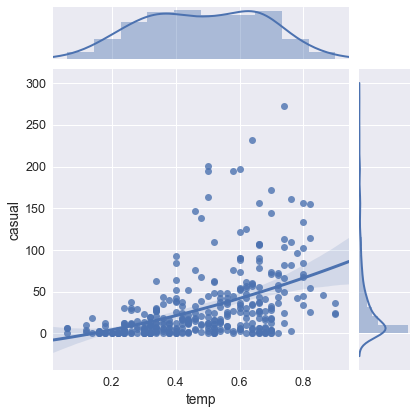

In [103]:
g = sns.JointGrid(x="temp", y="casual", data=hr_smpl)  
g = g.plot_joint(sns.regplot, order=2)  
g = g.plot_marginals(sns.distplot) 

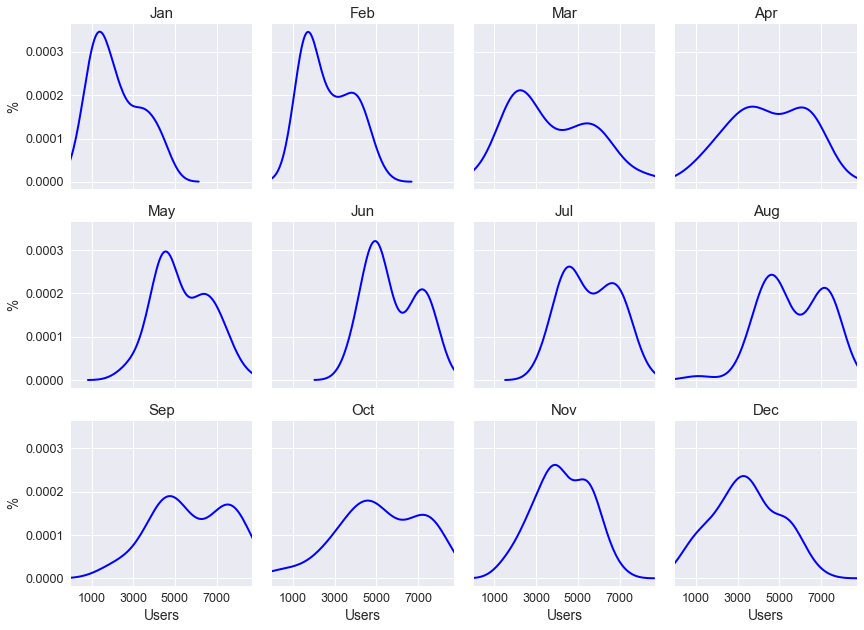

In [36]:
g = sns.FacetGrid(day_data, col="mnth", col_wrap=4, size=3, xlim=(0, max(day_data['cnt'])))
g.map(sns.kdeplot, "cnt", color='b');

titles = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    
g.set_axis_labels("Users", "%");
g.set(xticks=[1000, 3000, 5000, 7000]);

On a more fine-grained level, another temporal trend can be diurnal patterns. For instance, if the system is used by commuters a lot, we would expect more users during rush hours (roughly 7-9am and 4-6pm). The plot below supports this intuition, and sees prominent peaks at 8am and 5-6pm.

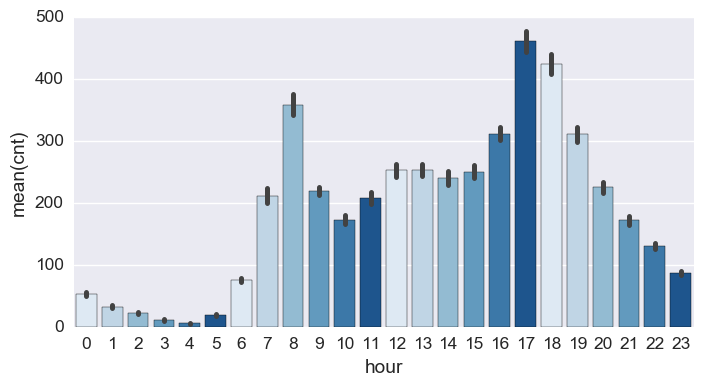

In [11]:
ax = plt.subplots(figsize=(8, 4))
ax = sns.barplot(x=hour_data['hr'], y=hour_data['cnt'], palette=sns.color_palette("Blues"));
ax.set_xlabel('hour')
ax.set_ylabel('mean(cnt)')

At this point, it is interesting to look into different behaviours of casual and registered users. From the plot below, we can see that both are following clearly differing patterns. If we do not consider night-time usage, which is low for both classes of users, registered user usage (blue bars) follows a bi-modal distribution (with peak hours as modes), and casual user usage (red bars) is normally distributed without any modes. Also, user numbers are much higher for registered users than for casual users throughout the whole day. Together with the observation (from the correlation matrix) that some features (e.g., temperature) have different strengths of correlation with *'registered'* and *'casual'*, this motivates two separate prediction models.

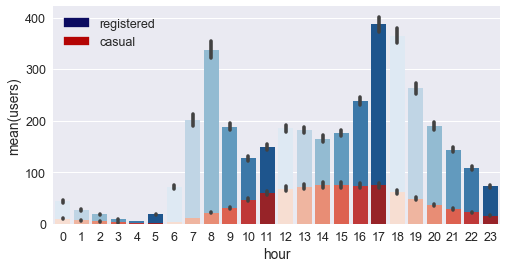

In [33]:
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=hour_data['hr'], y=hour_data['registered'], palette=sns.color_palette("Blues"));
sns.barplot(x=hour_data['hr'], y=hour_data['casual'], palette=sns.color_palette("Reds"));
ax.set_xlabel('hour')
ax.set_ylabel('mean(users)')

reg_patch = mpatches.Patch(color='#0B0B61', label='registered')
cas_patch = mpatches.Patch(color='#B40404', label='casual')
ax.legend(handles=[reg_patch, cas_patch])

### 4) Influence of Type of Day

Our second type of features are those that describe the type of each day, i.e., the features holiday, working day and weekday.  For this analysis, we will focus on whether or not a day was a working day. Based on our observations above, we would expect higher usage on working days, as we observed the highest count of users during commute hours.

The plot below shows the distributions of user counts on working and non-working days, respectively.
Our first observation is that we indeed see a trend towards lower utilization of bikes on most holidays (from the figure it seems as if the distribution is a bit more right-skewed). On the other hand, some of these non-working days are very active bike sharing days (see green bars in the rug plot on the bottom). At the same time, many working days have a medium amount of users, while non-working days tend to be a bit more extreme in both directions.

This observation also intuitively makes sense in several aspects. As seen above, most users use the system during peak hours. This suggests that most users use the system to commute, which is not required on non-working days. On the other hand, holidays or weekend days that are linked to a cultural programme in the city might attract more people to the city overall, and more people to use public transport in combination with a bike rather than a car (difficulty to find a parking space, intention to drink alcohol, etc., may be factors contributing to this). 

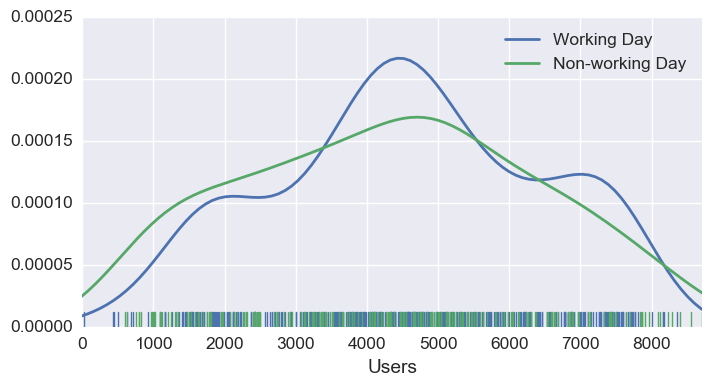

In [13]:
ax = plt.subplots(figsize=(8, 4))
ax = sns.distplot(day_data[day_data['workingday'] == 1]['cnt'], kde=True, hist=False, rug=True, label='Working Day');
ax = sns.distplot(day_data[day_data['workingday'] == 0]['cnt'], kde=True, hist=False, rug=True, label='Non-working Day');
ax.set_xlabel('Users')
ax.set_xlim([0, max(day_data['cnt'])]);

Next, we will check if there is a trend on weekdays vs weekends. From the figure below, we can see that this is clearly the case, as *weekday = 0* (Sunday) and *weekday = 6* (Saturday) are different from all other weekdays in their ride distribution.

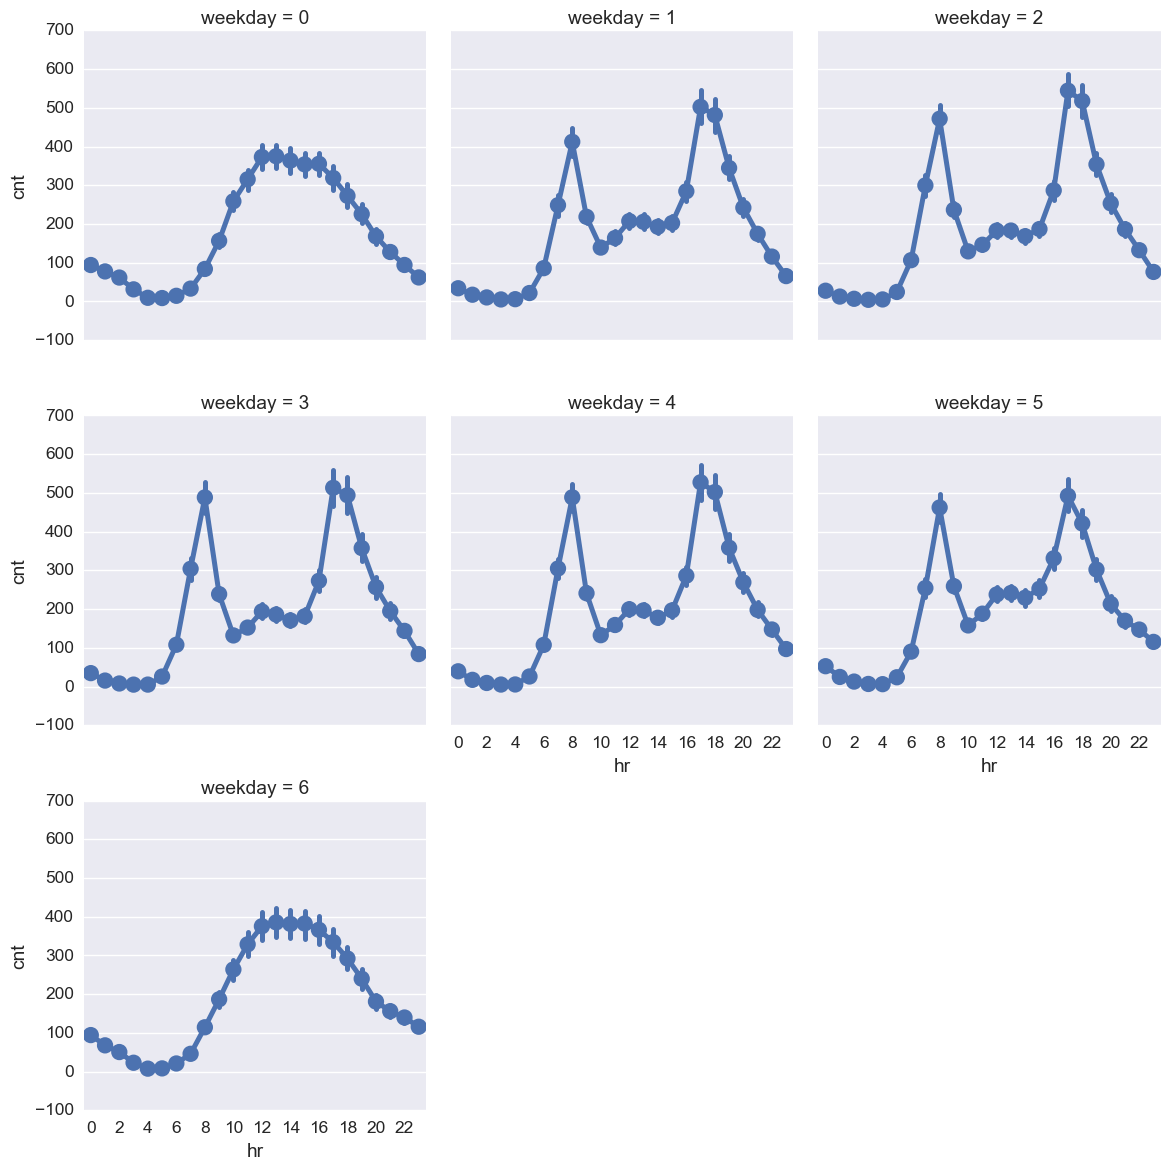

In [14]:
g = sns.factorplot(x='hr', y='cnt', data=hour_data, col='weekday', col_wrap=3);
g.set(xticks=np.arange(0,24,2))
g.set(xticklabels=np.arange(0,24,2))

We will stop with this result, but can think of additional investigations regarding the difference between working and non-working days:
* We could check whether the trend of less rides on holidays could be explained by non-working days being mostly in colder weather situations (Thanksgiving, Christmas, New Year's,...).
* We could check what the difference between public holidays (often during the week, e.g. July 4th) and weekend days is, and whether the high user numbers for some non-working days could be explained by a combination of both.
* We could check whether there is a trend on the weekdays, e.g., user numbers continouously increasing inbetween Monday and Friday
* etc.

### 5) Influence of Weather

Next up, we will check how the concrete weather situation may influence sharing. In particular, we expect less activity in the system on bad weather conditions (e.g., rain). The following figure visually supports this assumption.


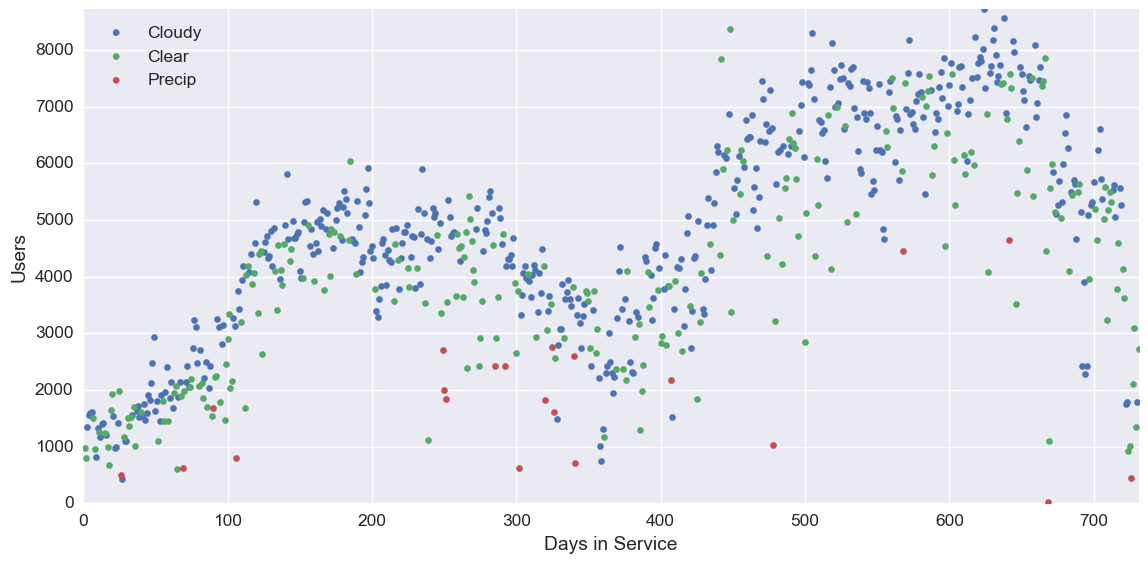

In [15]:
g = sns.FacetGrid(day_data, hue='weathersit', size=6, aspect=2);
g.map(plt.scatter, 'instant', 'cnt');

#replace numerical season indicator with textual representation
handles, labels = g.fig.get_axes()[0].get_legend_handles_labels()
titles = ['Cloudy', 'Clear', 'Precip', 'Strong Precip']
g.fig.get_axes()[0].legend(handles, titles, loc='upper left')

g.set_axis_labels('Days in Service', 'Users');
g.fig.get_axes()[0].set_ylim(0,max(day_data['cnt']));
g.fig.get_axes()[0].set_xlim(0,max(day_data['instant']));

It is further interesting to observe that -- according to the data -- we are probably dealing with a city with very dry summers and few raining days in other seasons, as there exists very few days that are classified as *'precip'*, i.e., days with precipitation.

However, a quick comparison with the FreeMeteo service for Washington DC shows several mismatches with the recorded data. For instance, FreeMeteo recorded several hours of rain for October 27th, 2011 (http://bit.ly/22Z1F9t), while the dataset lists this day as 'cloudy/mist'. It seems as if the *'weathersit'* feature is some average weather condition and not an indicator of whether there was rain/snow or not. 

We can also observe that on day 668 (October 29th, 2012), near zero (22) users used the bike sharing system. The reason for this was probably Hurricane Sandy (https://en.wikipedia.org/wiki/Hurricane_Sandy), a storm which hit the US east coast. Note that even for Hurricane Sandy, the weather condition was not set to the worst category, but rather as *'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'*.

These issues aside, the plot below shows more active bikers on clear days than on cloudy or rainy days.

In the plot below, we use the hourly weather situation and we see indeed more occurrances of *'precip'*, however only three of *'strong precip'* (none of which associated with Sandy), while summers still tend to be very dry.

Further investigation could thus be put into:
* Validating the weather information with information from an external source
* Enriching the data with more precise weather information, especially with information about rainfall.

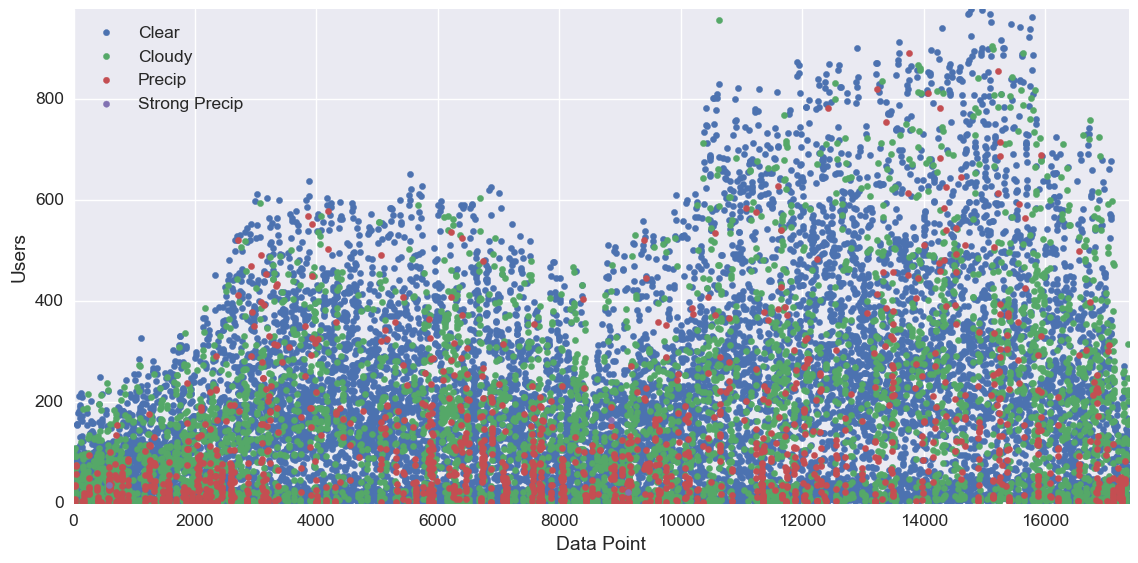

In [16]:
g = sns.FacetGrid(hour_data, hue='weathersit', size=6, aspect=2)
g.map(plt.scatter, 'instant', 'cnt')

#replace numerical season indicator with textual representation
handles, labels = g.fig.get_axes()[0].get_legend_handles_labels()
titles = ['Clear', 'Cloudy', 'Precip', 'Strong Precip']
g.fig.get_axes()[0].legend(handles, titles, loc='upper left')

#change x/y labels
g.set_axis_labels('Data Point', 'Users');
g.fig.get_axes()[0].set_ylim(0,max(hour_data['cnt']));
g.fig.get_axes()[0].set_xlim(0,max(hour_data['instant']));

We also observe that with increasing temperature and decreasing humidity, the number of rides tends to be higher (warm and clear days). This reflects the correlations we have found in the correlation matrix above. We could check more details, for instance:

* For very high *'temp'*/*'atemp'*, there are few rides recorded. This can colloquially be explained by the felt temperature being too hot to ride a bike. The regression fitted graph below does currently neglect this.
* There seem to be no recorded windspeed and humidity values in (0, 0.1), which may be odd, since for both temperature features, we have values in that range. However, it could be that these are cases, in which wind or rain are just not intense enough to be measured.

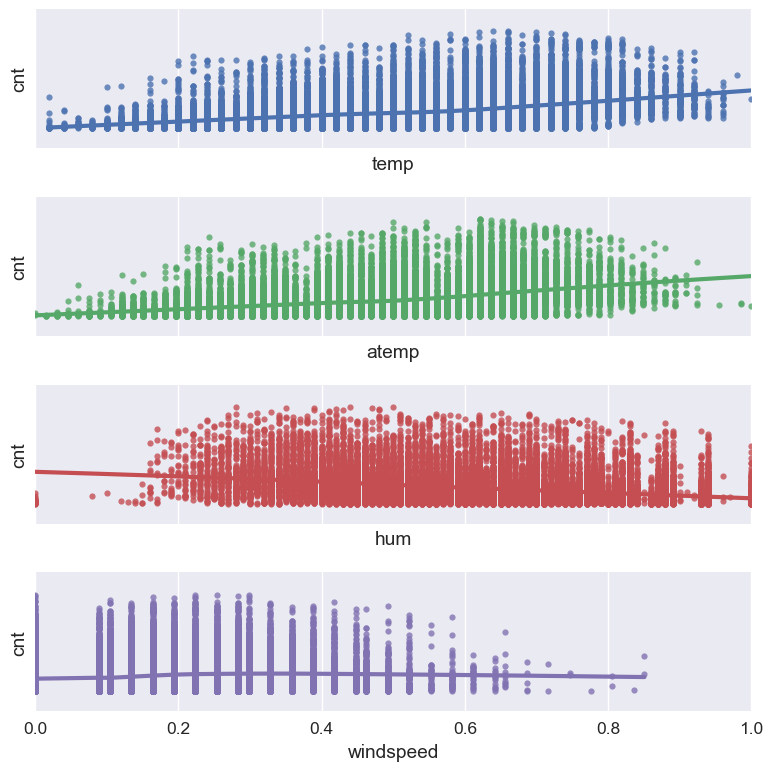

In [17]:
g, axes = plt.subplots(4, 1, figsize=(8, 8), sharex=True)

sns.regplot(x="temp", y="cnt", data=hour_data,
           lowess=True, ax=axes[0])
sns.regplot(x="atemp", y="cnt", data=hour_data,
           lowess=True, ax=axes[1])
sns.regplot(x="hum", y="cnt", data=hour_data,
           lowess=True, ax=axes[2]);
sns.regplot(x="windspeed", y="cnt", data=hour_data,
           lowess=True, ax=axes[3]);

g.get_axes()[0].set_xlim([0,1]);
plt.setp(axes, yticks=[])
plt.tight_layout()

### 6) Casual vs. Registered Users

Finally, we will provide some further insights (apart from the time of day) into how casual and registered users are using the service. For that, we introduce a metric that measures the fraction of casual users participating in the service at a given time as 

$$\text{cas_frac}  = \frac{\text{# casual users}}{\text{# total users}}$$

In winter months (blue shaded areas in the plot), registered users are using the service almost exclusively, with only rare occurances of higher casual user counts (*cas_frac* usually < 0.1); in warmer months, higher fractions of casual users appear. Additionally, casual users are much more frequent on holidays and weekends, while days with high fractions of registered users are usually working days. There are some interesting outliers that may be worth investigating.

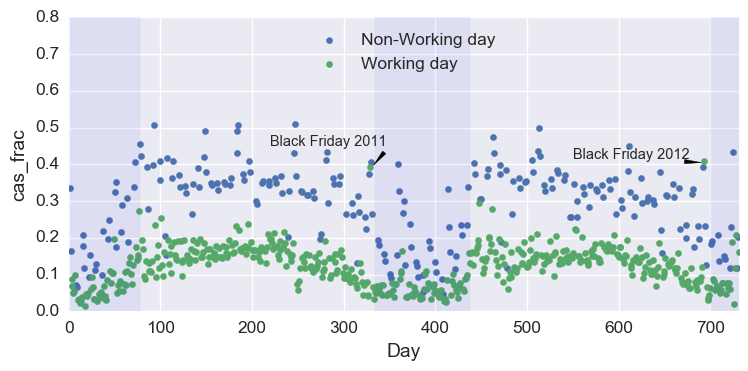

In [18]:
day_data['cas_frac'] = day_data['casual'] / day_data['cnt']

g = sns.FacetGrid(day_data, hue='workingday', size=4, aspect=2)
g.map(plt.scatter, 'instant', 'cas_frac')

#replace numerical season indicator with textual representation
handles, labels = g.fig.get_axes()[0].get_legend_handles_labels()
titles = ['Non-Working day', 'Working day']
g.fig.get_axes()[0].legend(handles, titles, loc='upper center', fancybox=True)

#change x/y labels
g.set_axis_labels('Day', 'cas_frac');
g.fig.get_axes()[0].set_ylim(0,0.8);
g.fig.get_axes()[0].set_xlim(0,max(day_data['instant']));

plt.axvspan(0, 78, color='b', alpha=0.05);
plt.axvspan(334, 438, color='b', alpha=0.05);
plt.axvspan(700, 731, color='b', alpha=0.05);

plt.annotate('Black Friday 2011', xy=(330, .39), xytext=(220, .45), size='x-small',
             arrowprops=dict(facecolor='black', shrink=0.15, headwidth=3,
                             width=3));

plt.annotate('Black Friday 2012', xy=(690, .405), xytext=(550, .415), size='x-small',
             arrowprops=dict(facecolor='black', shrink=0, headwidth=3,
                              width=3));

For instance, we can see (below) that among the 50 days with the highest casual frequencies there are only 2 working days, the 'black friday' sales days in both 2011 and 2012.

Also most of the top 20 working days with high *cas_frac* are Mondays and Fridays (17/21). One explanation here could be that tourists visiting Washington over a long weekend used the cycles on these days.

In [19]:
print day_data.sort_values(by='cas_frac').tail(50).loc[day_data['workingday'] == 1];

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
328      329  2011-11-25       4   0    11        0        5           1   
692      693  2012-11-23       4   1    11        0        5           1   

     weathersit      temp     atemp      hum  windspeed  casual  registered  \
328           1  0.375000  0.380671  0.64375   0.098896    1095        1697   
692           1  0.368333  0.378779  0.56875   0.148021    1603        2307   

      cnt  cas_frac  
328  2792  0.392192  
692  3910  0.409974  


In [20]:
print day_data[day_data['workingday'] == 1].sort_values(by='cas_frac').tail(20);

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
457      458  2012-04-02       2   1     4        0        1           1   
531      532  2012-06-15       2   1     6        0        5           1   
594      595  2012-08-17       3   1     8        0        5           1   
727      728  2012-12-28       1   1    12        0        5           1   
216      217  2011-08-05       3   0     8        0        5           1   
510      511  2012-05-25       2   1     5        0        5           1   
223      224  2011-08-12       3   0     8        0        5           1   
234      235  2011-08-23       3   0     8        0        2           1   
552      553  2012-07-06       3   1     7        0        5           1   
185      186  2011-07-05       3   0     7        0        2           1   
551      552  2012-07-05       3   1     7        0        4           1   
181      182  2011-07-01       3   0     7        0        5           1   
93        94

### 7) Summary

In summary, we can state the following:

* Several temporal trends can be detected in the dataset. These trends are: (i) the daily ride count is growing the longer the bike sharing system is in place, (ii) there are more rides in summer than in winter, or in other words in warmer and sunnier weather than in cold and rainy / snowy days, (iii) there are clear diurnal patterns for registered users, who mainly use the system during peak times, and (iv) the behaviour of casual users is different from the one of registered users in that regard.
* Also, the type of day influences the ride count. Users tend to use the system more on working days, whereas some non-working days are among the days with highest usage.
* The weather influences user counts as well. User numbers increase with increasing temperature, and decreasing humidity and windspeed.
* Casual and registered users are different in several ways. For instance, the ratio of casual users is much higher in summer months than in winter months, and certain events can boost casual user counts significantly. On working days, the number of casual users is also lower than on weekends and holidays.

## B. Building a Predictive Model

In the following, we will build two predictive models: one that predicts the amount of casual users, and one that predicts the number of registered users/rides for a given hour.

Before actually building the predictive model, we need to use the results of the exploratory data analysis to modify some of the data and to create a few additional features.

### 1) Missing values handling

If there were any missing values in our dataset, we would have to deal with those empty fields. If we would have enough data, and the number of missing values is comparatively small, we could simply remove the relevant feature vectors. However, if we only have a small data set or a large fraction of missing values, we would have to impute these values to retain as much information as possible. There are different strategies to do so, ranging from simply imputing the mean value of the particular feature (however, this can distort the distribution of the feature) towards kNN imputation (which is computationally costly).

Since we do not have any missing values in this case, we can skip this step.

###  2) Outlier handling

Next, outliers could affect the performance of our model. Here, we need to distinguish between outliers that should be kept in the data as they can generally occur, and outliers that are not generally expected. The latter could for instance be caused by corrupt data, typos in entering the data, and so on --- such errors do not occur in the bike sharing data set.

However, other outliers could be removed, too. For instance, Hurricane Sandy will probably be a one-time event and the data point recorded will not yield any useful information for our model. We can thus safely remove that data point.

Since we will build two models, we could also investigate outliers with regards to the respective subsets of the data. For instance, we could think about removing the black Friday outliers, as they are clear outliers with respect to the casual user ratio. This event however will re-occur every year, and we can anticipate demand being high on these days again. As such, we have the option to remove them as outliers to improve the model performance for the remainder of the year, but we could also create a new feature in which we could group all high demand days (Black Fridays, several public holidays, etc.). This can be done in a more sophisticated model, as it would require identifying these days manually or with external sources.

In [20]:
# Remove Hurricane Sandy outlier (as an example for outlier handling)
# this affects only one entry and shows that data was only recorded for one hour on that day,
# or that there was no use at all after hour 0
hour_data = hour_data[hour_data['dteday'] != '2012-10-29']
day_data = day_data[day_data['dteday'] != '2012-10-29']

### 3) Feature Engineering
We can think of engineering several features that could help in improving the model performance. We can for instance define a 'peak' feature, which are the peak hours discovered above, but only when they fall on a working day. This should help in predicting the ride count during these hours more accurately.

In [22]:
def peak_hour(x):
    if (x == 8) or (x >= 16 and x <= 19):
        return 1;
    else:
        return 0

hour_data['peak'] = hour_data['hr'].apply(lambda x: peak_hour(x))
peak_mask = (hour_data['workingday'] == 0) & (hour_data['peak'] == 1)
hour_data.ix[peak_mask, 'peak'] = 0

We could also create a 'weekend' feature in a similar way, since we have seen above that weekends follow a different distribution. However, this information is already in parts encoded in the weekday (6 and 0 for Saturday and Sunday, respectively) feature. A more sophisticated approach could still exploit this possibility, and others:

* one could think about a more appropriate model of the weather than 'weathersit' currently is. Here, instead of coarse-grained categories, a discrete value could be used. Whether or not this would be useful would have to be evaluated, as some weather information is already encoded in 'hum', 'temp' and 'atemp'.
* one could think about ratio features. For instance, the ratio of temperature to humidity might be interesting, under the hypothesis that people like to bike more in warm and dry situations than in warm and humid conditions.
* etc...

### 4) Merging Datasets

Next, we will merge the hour and the day datasets. While they contain mostly the same information, we can find average values for each day in the day_data. Intuitively this might be useful, for instance, with regards to the weather: it may be bad in one particular hour in the morning, but the weather forecast for later that day is good, and as a consequence, people still use the bike sharing system frequently.

In [23]:
# we only need the weather columns, everything else is redundant or not needed in the model
all_data = pd.merge(hour_data, day_data[list(['dteday','atemp','hum','windspeed'])], on='dteday', how='right')

### 5) Normalization

Next, we would usually normalize the data at hand, e.g., by min-max scaling. However, as we will employ a model that can handle non-normalized data very well, we skip this step in this work.

### 6) Finally: the predictive model

As mentioned above, we will build two different models: Model A will be responsible for predicting the number of registered users for a specific hour, and model B will be responsible for predicting the number of casual users for that hour. The overall prediction will then be the sum of the predictions of both models.

First, we split up the data into a train and a testset (10% of the dataset, randomly chosen).

In [24]:
from sklearn.model_selection import train_test_split
import numpy as np
train, test = train_test_split(all_data, test_size=0.1)

In [25]:
target_train_registered = train['registered']
target_train_casual = train['casual']

target_test_registered = test['registered']
target_test_casual = test['casual']

target_overall = train['cnt']
target_test_overall = test['cnt']

train = train.drop(['registered', 'casual', 'cnt', 'dteday'], axis=1)
test = test.drop(['registered', 'casual', 'cnt', 'dteday'], axis=1)

#### i) Model A...
... will predict the number of registered users for a specific hour. In this task we will use a single model (Random Forest Regression) to do this task. More advanced approaches could use meta models that take as an input the predictions of several single models and then apply some weighted averaging function on these predictions to come up with a final prediction.

For a first try, we will use RandomForest as, for instance, they do not assume linearity in the features, they can handle categorical features, and they do not easily overfit and thus typically yield much better generalization results even with a high number of regression trees employed.

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

As a metric, we will use Mean Absolute Error (MAE). We could directly use the MAE criterion for the regressor, however, this currently seems to have severe drawbacks and will not be fixed before sklearn 0.19 (see, e.g.: https://www.kaggle.com/c/allstate-claims-severity/forums/t/24293/sklearn-randomforestregressor-mae-criterion). Therefore, we need to apply the MSE criterion when training our model. Note that this incurs high penalties on extreme cases (outliers), which in this case is not desired.

In [27]:
rfr = RandomForestRegressor(n_estimators=100, criterion='mse')
rfr.fit(train,target_train_registered)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [28]:
print 'MAE: ', mean_absolute_error(target_test_registered, rfr.predict(test))

MAE:  19.1431933257


This MAE is much better than the result we obtain from a standard linear regression (see below). In a more sophisticated approach, we would also test against other models (e.g., KNN may make sense here).

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train,target_train_registered)
print 'MAE: ', mean_absolute_error(target_test_registered, lr.predict(test))

MAE:  71.5744611842


We can also check if changing the number of trees helps in reducing the MAE further:

In [30]:
errors = []
for i in np.arange(10, 300, 10):
    rfr = RandomForestRegressor(n_estimators=i)
    rfr.fit(train,target_train_registered)
    errors.append(mean_absolute_error(target_test_registered, rfr.predict(test)))

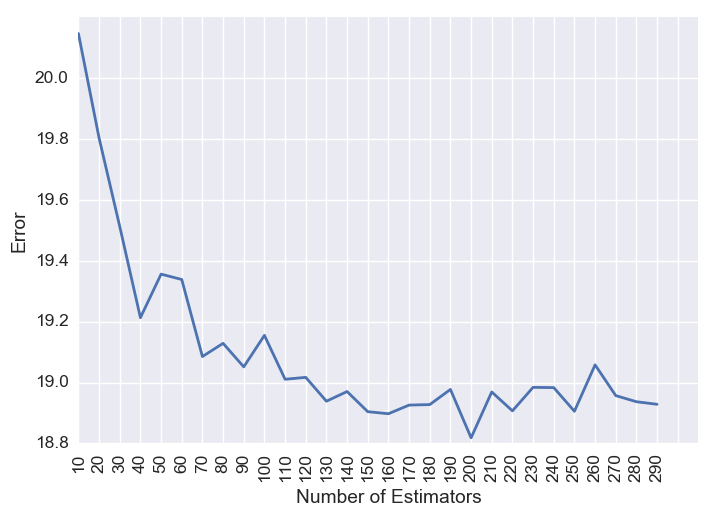

In [31]:
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Number of Estimators');
plt.xticks(np.arange(0,30,1), np.arange(10, 300, 10), rotation='vertical');

In general, the errors improve with increasing numnber of estimators, however not to a big extent after the initial drop.

Next, we perform cross-validation to see if this trend can be confirmed. Cross-validation avoids tuning model parameters in a way that in the end fits our model on to the testset and loses generalizability. Here, we will train the model on multiple combinations of train data subsets, and evaluate against the respective remaining parts of the train data set. We will do 5-fold cross-validation below (another typical value would be 10):

In [32]:
from sklearn.model_selection import cross_val_score
cv_score = []
for i in np.arange(50, 250, 20):
    rfr = RandomForestRegressor(n_estimators=i)
    cv_score.append(np.mean(cross_val_score(rfr, train, target_train_registered, cv=5)))

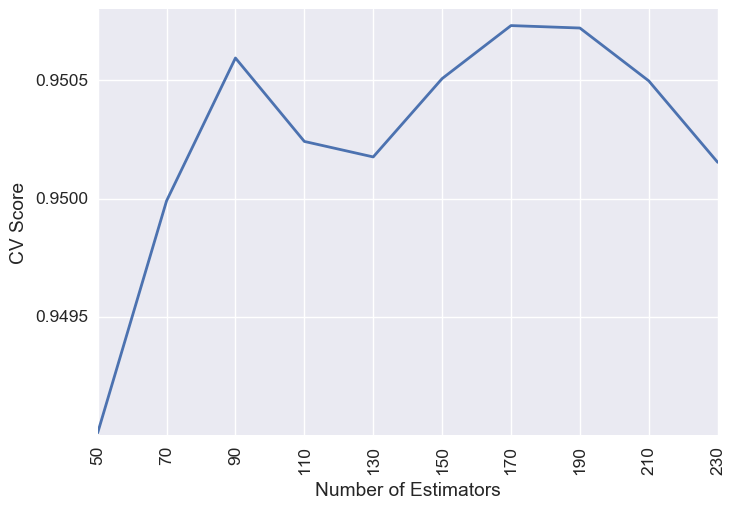

In [33]:
plt.plot(cv_score)
plt.ylabel('CV Score')
plt.xlabel('Number of Estimators');
plt.xticks(np.arange(0,10,1), np.arange(50, 250, 20), rotation='vertical');

We see that the CV score indeed increases with the number of estimators, but this increase is inconsistent and only on a very small scale (see scale of y-axis). As computational cost is not really important at this size of a data set, we can set our number of estimators in the final predictor quite high. Similarly, we could evaluate other parameters of our RandomForestRegressor (e.g., does the model improve for generalization if we limit max_depth?), but this can be left for a more sophisticated model.

Our predictor for the number of registered users will thus be the following (Note that this does indeed yield an improvement for the MAE compared to n_estimators=100).:

In [34]:
rfr = RandomForestRegressor(n_estimators=230)
rfr.fit(train,target_train_registered)
reg_predictions = rfr.predict(test)
print 'MAE (registered): ', mean_absolute_error(target_test_registered, reg_predictions)

MAE (registered):  18.9379296543


In [35]:
print train.columns
rfr.feature_importances_

Index([u'instant', u'season', u'yr', u'mnth', u'hr', u'holiday', u'weekday',
       u'workingday', u'weathersit', u'temp', u'atemp_x', u'hum_x',
       u'windspeed_x', u'peak', u'atemp_y', u'hum_y', u'windspeed_y'],
      dtype='object')


array([  2.05540749e-01,   1.08326368e-03,   1.07021487e-04,
         2.86040450e-03,   2.73137846e-01,   1.22699884e-03,
         9.15607940e-03,   3.25442302e-02,   1.87012402e-02,
         9.76701103e-03,   1.15701744e-02,   1.26128059e-02,
         4.46063084e-03,   3.84129829e-01,   1.72215955e-02,
         7.98755358e-03,   7.89256619e-03])

We can observe that our engineered feature *'peak'* was indeed most important feature for the forest, which confirms our intuiton gained from the EDA (peak hours are extremely important for registered users). Also note that *'hr'* is still the second most important feature, followed by *'instant'*. The latter is somewhat surprising, but encodes the trend of gaining more users with a longer operating time for the system in total.

#### ii) Model B...

...will be responsible for the casual user prediction. We use the same methodology as above in this scenario. Note that there are possibly better models to choose -- however, this would require extensive testing.

In [36]:
cv_score = []
for i in np.arange(50, 250, 20):
    rfr = RandomForestRegressor(n_estimators=i)
    cv_score.append(np.mean(cross_val_score(rfr, train, target_train_casual, cv=5)))

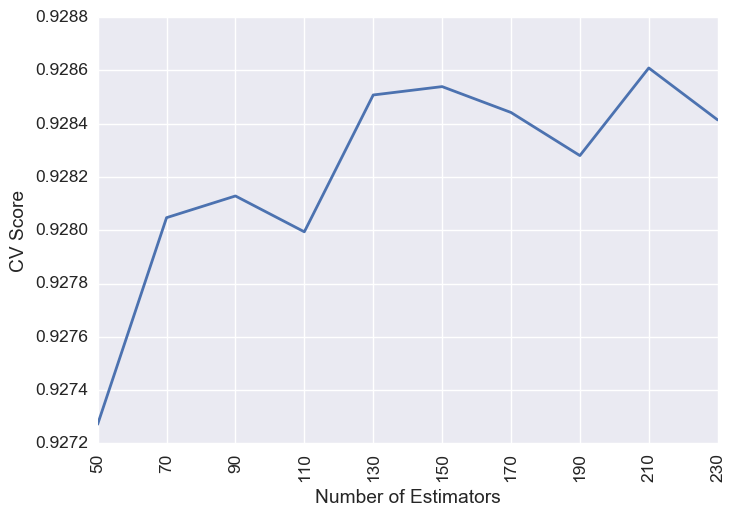

In [37]:
plt.plot(cv_score)
plt.ylabel('CV Score')
plt.xlabel('Number of Estimators');
plt.xticks(np.arange(0,10,1), np.arange(50, 250, 20), rotation='vertical');

Again, we see an increase in the CV score with the number of estimators growing, and this time the effect is a bit more prominent.

In [38]:
rfr = RandomForestRegressor(n_estimators=230)
rfr.fit(train,target_train_casual)
cas_predictions = rfr.predict(test)
print 'MAE (Casual): ', mean_absolute_error(target_test_casual, rfr.predict(test))

MAE (Casual):  7.74066142993


In [39]:
print train.columns
rfr.feature_importances_

Index([u'instant', u'season', u'yr', u'mnth', u'hr', u'holiday', u'weekday',
       u'workingday', u'weathersit', u'temp', u'atemp_x', u'hum_x',
       u'windspeed_x', u'peak', u'atemp_y', u'hum_y', u'windspeed_y'],
      dtype='object')


array([ 0.0750494 ,  0.0016415 ,  0.00112425,  0.00528014,  0.35082917,
        0.00328224,  0.01329033,  0.19114769,  0.00484525,  0.12360363,
        0.11057227,  0.03882161,  0.00921428,  0.00541135,  0.03384263,
        0.01458913,  0.01745514])

Contrary to registered users, the *'peak'* feature has relatively little importance for casual users (although *'hr'* is still the most important feature). Also note that *'instant'* is not as important here, which makes sense as a growing number of users is particularly expected for registered, but not neccessarily for casual users, who might just visit the city once. Instead, we see temperature and humidity gaining importance, also confirming an intuition and our EDA that casual users are not using the service in bad weather.

#### iii) Putting things together

Finally, our overall prediction is the sum of both models

In [40]:
cnt_predictions = reg_predictions + cas_predictions
print 'MAE (Overall): ', mean_absolute_error(target_test_overall, cnt_predictions)

MAE (Overall):  22.266818432


Besides MAE, we could use several other metrics for evaluation. For regression, these could be MSE (Mean Squared Error), or R2 Score. We could also investigate those instances, for which our model did not perform well (i.e., high error), more closely to find out more characteristics of the data or to detect further outliers.

## C. Summary

In this Notebook we have performed an exploratory data analysis (EDA) and based on that analysis constructed a model that predicts the number of rides taken in a municipal bike sharing system at a given hour. As suggested in the EDA, we used a two-staged model that separated the prediction for casual users from the one for regular users in the first stage, and combined both obtained predictions into the overall model in the second stage.

Throughout the EDA we have listed ideas for digging deeper in the data. Also, the model can be improved by employing, for instance, a weighted average model on several predictors in the first stage of the model. Another technique to improve the model further would be to employ feature selection. For instance, we could select features based on the correlation matrix (choose features in a way that correlation among them is minimized).